In [2]:
import pandas as pd
from sklearn.datasets import load_digits


digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

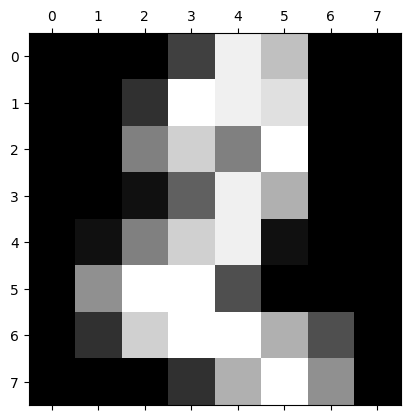

In [8]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.data[2].reshape(8,8))

In [12]:
X= pd.DataFrame(digits.data,columns = digits.feature_names)
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [15]:
y= digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state=234,
)

In [18]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()


In [20]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
model.score(X_test, y_test)

0.9361111111111111

In [27]:
X.shape

(1797, 64)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

In [30]:
X_pca.shape

(1797, 40)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size= 0.2, random_state=123)

In [32]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
model.score(X_test, y_test)

0.9722222222222222

#EXERCISE

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

In [7]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [8]:
df.FastingBS.unique()

array([0, 1])

In [9]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [10]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [11]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

#Now lets see what can happen here with the column 'ExerciseAngina'

In [12]:
target = {'N':0, 'Y':1}
df['ExerciseAngina']= df['ExerciseAngina'].map(target)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [13]:
df = pd.get_dummies(df, drop_first= True, dtype=int)
df = df.astype(int)

In [14]:
df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,1,0,0,1,0,0,1
1,49,160,180,0,156,0,1,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0,0,0,1,1,0,0,0,1,0,1
3,48,138,214,0,108,1,1,1,0,0,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,1,0,1,0,0,1


In [31]:
df.shape

(918, 16)

In [15]:
X= df.drop(['HeartDisease'], axis= 1)


In [16]:
y=df['HeartDisease']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.49044933,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.49044933,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12951283,  0.7701878 , ...,  2.03894663,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ..., -0.49044933,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.49044933,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.49044933,
        -1.00218103,  1.15067399]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled , y, test_size=0.2, random_state= 234
)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC




model_params = {
    'RandomForest' : {
        'model':  RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'svm' : {
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'LogisticRegression' : {
        'model': LogisticRegression(solver= 'liblinear', multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'GuassianNB' : {
        'model' : GaussianNB(),
        'params' : {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        }
    },
    'DecisionTree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
             'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'max_features': ['sqrt', 'log2', None]
        }
    }
}


In [23]:
score= []
for i, j in model_params.items():
  clf= GridSearchCV(j['model'], j['params'], cv=5 , return_train_score=False)
  clf.fit(X_train,y_train)
  score.append({
      'model_name': i,
      'best_params' : clf.best_params_,
      'best_scores' : clf.best_score_
      })
df_results= pd.DataFrame(score)
df_results

,model_name,best_params,best_scores
0,RandomForest,{'n_estimators': 5},0.844730
1,svm,"{'C': 1, 'kernel': 'rbf'}",0.861075
2,LogisticRegression,{'C': 1},0.858308
3,GuassianNB,{'var_smoothing': 1e-09},0.858298
4,DecisionTree,"{'criterion': 'gini', 'max_depth': 30, 'max_fe...",0.843398


In [25]:
from sklearn.decomposition import PCA

pca= PCA(0.95)

X_pca=pca.fit_transform(X_scaled)
X_pca

array([[ 3.10322476e+00, -4.53348653e-01, -7.29354131e-01, ...,
         2.81716211e-01,  2.21130833e-02,  2.99076030e-01],
       [ 1.88575560e-01, -1.09859531e+00, -7.04751815e-01, ...,
         8.89134950e-01,  2.47695163e-01, -5.30215318e-02],
       [ 1.60169874e+00,  2.12049455e+00, -5.04457557e-01, ...,
        -3.80592128e-01,  2.02703750e+00,  5.41199357e-01],
       ...,
       [-1.75381674e+00, -1.48385851e+00,  3.12917676e-01, ...,
        -4.33233327e-02, -4.44874741e-01,  5.18144440e-02],
       [ 1.07029619e+00,  1.88973383e-01, -1.80807242e+00, ...,
         1.17762577e+00, -1.40085670e+00,  2.07430932e-02],
       [ 2.49669350e+00, -4.73266866e-01,  1.01566593e+00, ...,
         3.94855418e-02,  6.99462872e-02,  2.84979449e-03]])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca , y, test_size=0.2, random_state= 234
)

In [28]:
model_params = {
    'RandomForest' : {
        'model':  RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'svm' : {
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'LogisticRegression' : {
        'model': LogisticRegression(solver= 'liblinear', multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'GuassianNB' : {
        'model' : GaussianNB(),
        'params' : {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        }
    },
    'DecisionTree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
             'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'max_features': ['sqrt', 'log2', None]
        }
    }
}

In [29]:
score= []
for i, j in model_params.items():
  clf= GridSearchCV(j['model'], j['params'], cv=5 , return_train_score=False)
  clf.fit(X_train,y_train)
  score.append({
      'model_name': i,
      'best_params' : clf.best_params_,
      'best_scores' : clf.best_score_
      })
df_results= pd.DataFrame(score)
df_results

,model_name,best_params,best_scores
0,RandomForest,{'n_estimators': 10},0.850182
1,svm,"{'C': 1, 'kernel': 'rbf'}",0.861085
2,LogisticRegression,{'C': 1},0.863769
3,GuassianNB,{'var_smoothing': 1e-09},0.847433
4,DecisionTree,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.839213


In [30]:
pca.n_components_

13

In [32]:
pca.explained_variance_ratio_

array([0.22449803, 0.11023583, 0.09442117, 0.08190894, 0.07459737,
       0.07093285, 0.06277115, 0.05500365, 0.05098187, 0.04446878,
       0.04125288, 0.03193887, 0.02843412])

In [34]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8967391304347826